### PyTorch Workflow
Reference:
* Stuck? Visit this: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Materials: https://www.learnpytorch.io
* Course: https://github.com/mrdbourke/pytorch-deep-learning

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Preparation/Loading

torch.Size([9]) torch.Size([9])
True
True


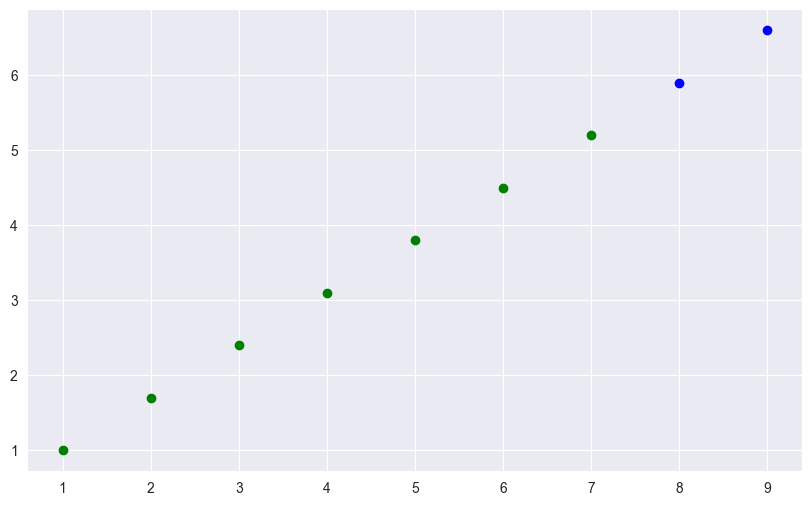

In [3]:
# Testing out with Linear Regression: y = B1*x + B0
weight = 0.7  # B1
bias = 0.3  # B0

# Generate some random data
X = torch.arange(1, 10)  # 100 samples, 1 feature
y = weight * X + bias
print(X.shape, y.shape)

# Split data into training and testing
train_split = int(0.8*(len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train) == len(y_train))
print(len(X_test) == len(y_test))

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Training data", c='g')
plt.scatter(X_test, y_test, label="Testing data", c='b')

### Model

In [4]:
class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def foward(self, x):
        return x * self.weight + self.bias

torch.manual_seed(42)
model = Linear()
with torch.inference_mode():  # Make the code run faster, use only for prediction
    y_model = model.foward(X)
print(y_model)

tensor([0.4655, 0.8022, 1.1389, 1.4756, 1.8123, 2.1490, 2.4856, 2.8223, 3.1590])


### Loss Function/Optimizer and training loop

In [5]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

loops = 20
train_loss_values = []
test_loss_values = []
epoch_count = []
for times in range(loops):
    model.train()  # Set the model save to training mode

    y_pred = model.foward(X_train)  # Forward pass

    l = loss(y_pred, y_train)  # Calculate loss

    optimizer.zero_grad()  # Reset gradients to zero before backpropagation

    l.backward()  # Backpropagation

    optimizer.step()  # Update weights using the optimizer and gradients

    model.eval()

    with torch.inference_mode():  # Disable gradient calculation for efficiency
        test_pred = model.foward(X_test)
        test_loss = loss(test_pred, y_test)

    if times % 10 == 0:
        epoch_count.append(times)
        train_loss_values.append(l.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {times} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: MSELoss() | MAE Test Loss: 3.526702404022217 
Epoch: 10 | MAE Train Loss: MSELoss() | MAE Test Loss: 0.0031662671826779842 


### Visualize the loss

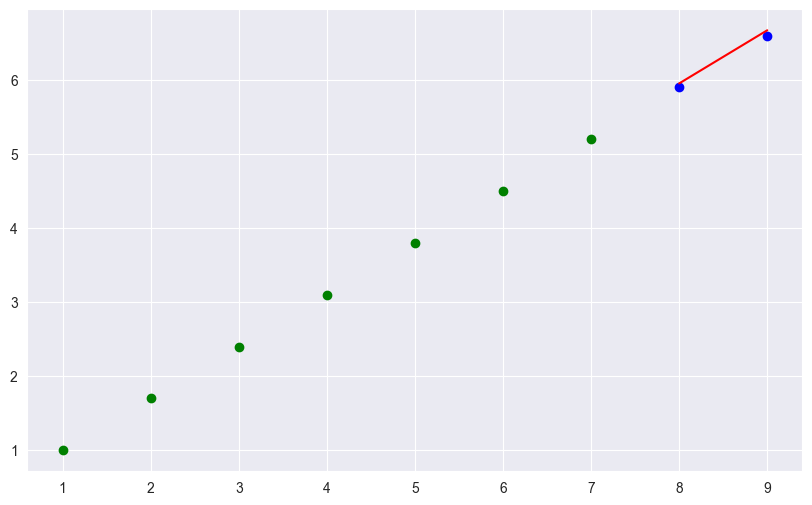

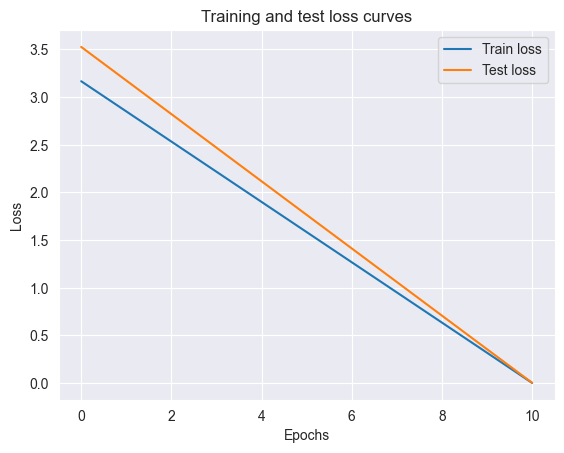

In [6]:
model.eval()

with torch.inference_mode():
    y_preds = model.foward(X_test)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Testing data", c='b')
plt.scatter(X_train, y_train, label="Training data", c='g')
plt.plot(X_test, y_preds, label="Model prediction", c='r')
plt.show()

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Saving model
There are 3 ways to save a model:
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [19]:
from pathlib import Path
# Create model save directory
model_path = Path('model save')
model_path.mkdir(parents=True, exist_ok=True)

# Save path
model_name = 'Pytorch_workflow.pth'  # Saving a model save name with .pt or .pth
model_save_path = model_path / model_name

# Save the model save.state_dict()
torch.save(model.state_dict(), model_save_path)

### Loading model
Since we save the model in model.state_dict() or the current epoch, we need to create a new run for it

In [120]:
print(model.state_dict())
loaded_model = Linear()
print(loaded_model.state_dict())
loaded_model.load_state_dict(model.state_dict())
print(loaded_model.state_dict())

OrderedDict({'weight': tensor([0.7176]), 'bias': tensor([0.2130])})
OrderedDict({'weight': tensor([0.0121]), 'bias': tensor([-0.6397])})
OrderedDict({'weight': tensor([0.7176]), 'bias': tensor([0.2130])})
